In [1]:
import numpy as np
import pandas as pd
#from ydata_profiling import ProfileReport
import os
import json

# Set the search path for files (assuming the directory is relative to the current script)
file_path_mc124 = os.path.join("..", "..","fine_dust_complete", ".csv")
df = pd.read_csv('../data/fine_dust_complete.csv', parse_dates=['datetime'])

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539422 entries, 0 to 542554
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   datetime     539422 non-null  datetime64[ns]
 1   station      539422 non-null  object        
 2   core         539422 non-null  object        
 3   value        539422 non-null  float64       
 4   hour         539422 non-null  int64         
 5   day          539422 non-null  int64         
 6   month        539422 non-null  int64         
 7   year         539422 non-null  int64         
 8   day_of_week  539422 non-null  int64         
 9   is_weekend   539422 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 45.3+ MB


In [2]:
# Pivot the data to get components as columns
pivot_df = df.pivot(index='datetime', columns='core', values='value')
pivot_df.sample(3)

core,no,no2,nox,pm10,pm2
datetime,,,,,
2018-08-06 18:00:00,13.0,35.0,54.0,15.0,5.0
2012-12-31 09:00:00,15.0,25.0,47.0,NaN,NaN
2011-06-06 15:00:00,8.0,33.0,45.0,NaN,NaN


In [3]:
correlation_matrix = pivot_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
core        no       no2       nox      pm10       pm2
core                                                  
no    1.000000  0.780391  0.977968  0.255882  0.205902
no2   0.780391  1.000000  0.873448  0.282188  0.178489
nox   0.977968  0.873448  1.000000  0.272118  0.206116
pm10  0.255882  0.282188  0.272118  1.000000  0.881323
pm2   0.205902  0.178489  0.206116  0.881323  1.000000


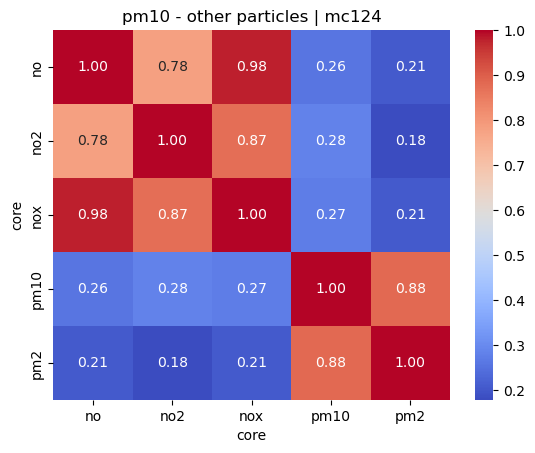

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("pm10 - other particles | mc124")
plt.show()

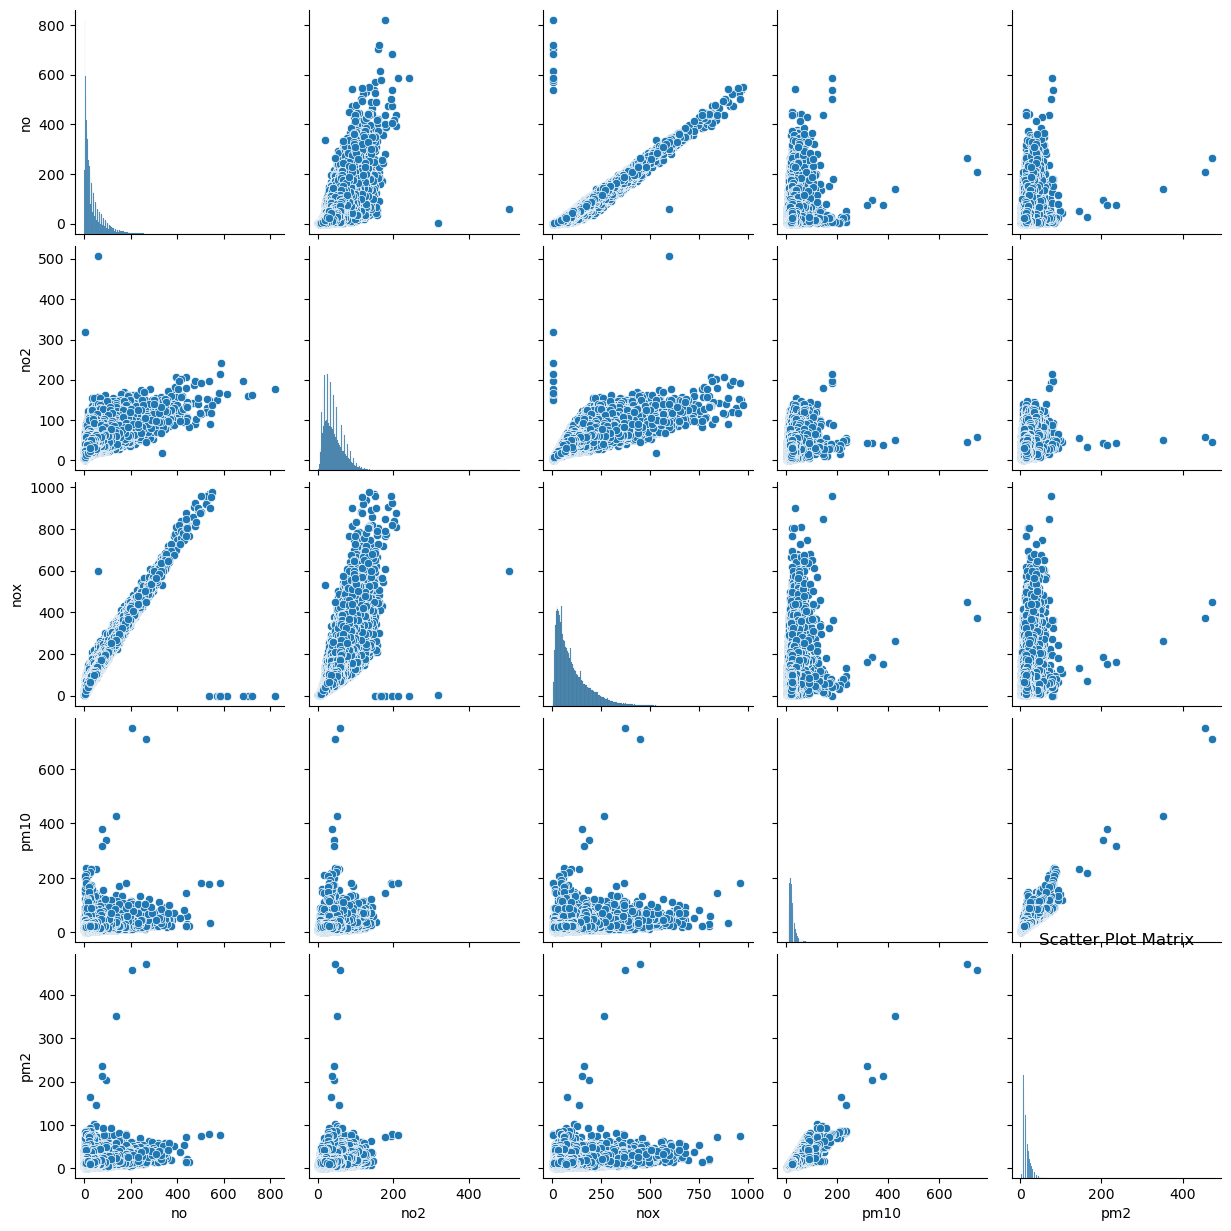

In [5]:
# Create scatter plots to visualize relationships
sns.pairplot(pivot_df)
plt.title("Scatter Plot Matrix")
plt.show()